In [1]:
# Имена которые давали детям в США за период с 1880 по 2010 год
import pandas as pd
names1880=pd.read_csv('datasets/babynames/yob1880.txt',
                     names=['name','sex','births'])
print(names1880)
# Общее число младенцев родившихся в году
print(names1880.groupby('sex').births.sum())

           name sex  births
0          Mary   F    7065
1          Anna   F    2604
2          Emma   F    2003
3     Elizabeth   F    1939
4        Minnie   F    1746
...         ...  ..     ...
1995     Woodie   M       5
1996     Worthy   M       5
1997     Wright   M       5
1998       York   M       5
1999  Zachariah   M       5

[2000 rows x 3 columns]
sex
F     90993
M    110493
Name: births, dtype: int64


In [2]:
# Собрать все данные в один файл
years=range(1880,2011)
pieces=[]
columns=['name','sex','births']

for year in years:
    path='datasets/babynames/yob%d.txt' % year
    frame=pd.read_csv(path,names=columns)
    
    frame['year']=year
    pieces.append(frame)
names=pd.concat(pieces,ignore_index=True)
print(names)

              name sex  births  year
0             Mary   F    7065  1880
1             Anna   F    2604  1880
2             Emma   F    2003  1880
3        Elizabeth   F    1939  1880
4           Minnie   F    1746  1880
...            ...  ..     ...   ...
1690779    Zymaire   M       5  2010
1690780     Zyonne   M       5  2010
1690781  Zyquarius   M       5  2010
1690782      Zyran   M       5  2010
1690783      Zzyzx   M       5  2010

[1690784 rows x 4 columns]


sex         F        M
year                  
2006  1896468  2050234
2007  1916888  2069242
2008  1883645  2032310
2009  1827643  1973359
2010  1759010  1898382


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

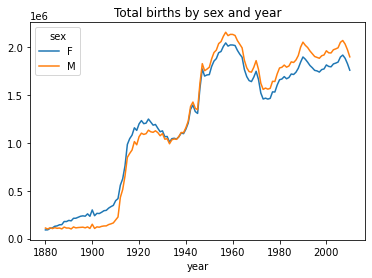

In [3]:
# Агрегирование
total_births=names.pivot_table('births',index='year',
                              columns='sex',aggfunc=sum)
print(total_births.tail())
total_births.plot(title='Total births by sex and year')

In [4]:
# Пополненный набор данных
def add_prop(group):
    births=group.births.astype(float)
    group['prop']=births/births.sum()
    return group
names=names.groupby(['year','sex']).apply(add_prop)
print(names)
# Проверить достоверность результатов
print(names.groupby(['year','sex']).prop.sum())

              name sex  births  year      prop
0             Mary   F    7065  1880  0.077643
1             Anna   F    2604  1880  0.028618
2             Emma   F    2003  1880  0.022013
3        Elizabeth   F    1939  1880  0.021309
4           Minnie   F    1746  1880  0.019188
...            ...  ..     ...   ...       ...
1690779    Zymaire   M       5  2010  0.000003
1690780     Zyonne   M       5  2010  0.000003
1690781  Zyquarius   M       5  2010  0.000003
1690782      Zyran   M       5  2010  0.000003
1690783      Zzyzx   M       5  2010  0.000003

[1690784 rows x 5 columns]
year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64


In [6]:
# Получить первые 1000 имён
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]
grouped=names.groupby(['year','sex'])
top1000=grouped.apply(get_top1000)
# Удалить групповой индекс
top1000.reset_index(inplace=True,drop=True)
print(top1000)

             name sex  births  year      prop
0            Mary   F    7065  1880  0.077643
1            Anna   F    2604  1880  0.028618
2            Emma   F    2003  1880  0.022013
3       Elizabeth   F    1939  1880  0.021309
4          Minnie   F    1746  1880  0.019188
...           ...  ..     ...   ...       ...
261872     Camilo   M     194  2010  0.000102
261873     Destin   M     194  2010  0.000102
261874     Jaquan   M     194  2010  0.000102
261875     Jaydan   M     194  2010  0.000102
261876     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]


In [8]:
# Второй вариант
pieces=[]
for year,group in names.groupby(['year','sex']):
    pieces.append(group.sort_values(by='births',ascending=False)[:1000])
top1000=pd.concat(pieces,ignore_index=True)
print(top1000)

             name sex  births  year      prop
0            Mary   F    7065  1880  0.077643
1            Anna   F    2604  1880  0.028618
2            Emma   F    2003  1880  0.022013
3       Elizabeth   F    1939  1880  0.021309
4          Minnie   F    1746  1880  0.019188
...           ...  ..     ...   ...       ...
261872     Camilo   M     194  2010  0.000102
261873     Destin   M     194  2010  0.000102
261874     Jaquan   M     194  2010  0.000102
261875     Jaydan   M     194  2010  0.000102
261876     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

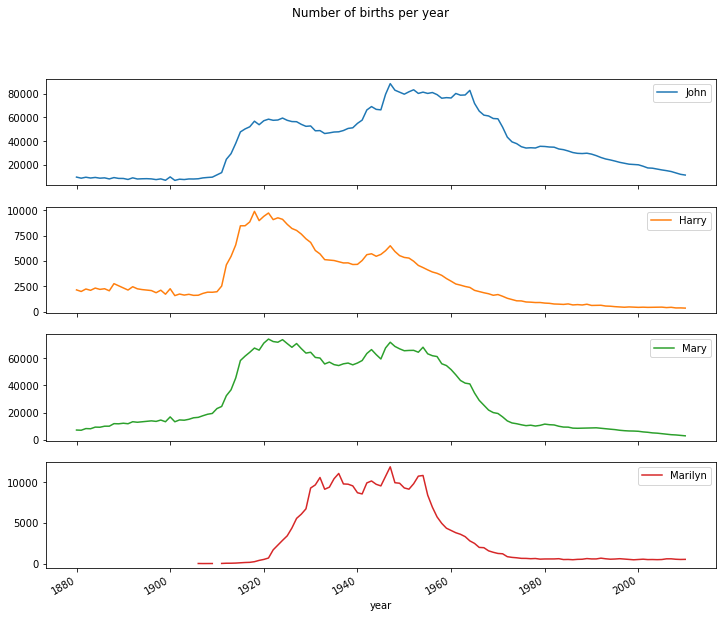

In [9]:
# Анализ тенденций в выборе имён
# Выделить мужчин и женщин
boys=top1000[top1000.sex=='M']
girls=top1000[top1000.sex=='F']
# Сводная таблица с общим числом родившихся по годам
total_births=top1000.pivot_table('births',index='year',
                                columns='name',
                                aggfunc=sum)
total_births.info()
subset=total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True,figsize=(12,10),grid=False,
           title='Number of births per year')

(array([1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980,
        1990, 2000, 2010]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 432x288 with 0 Axes>

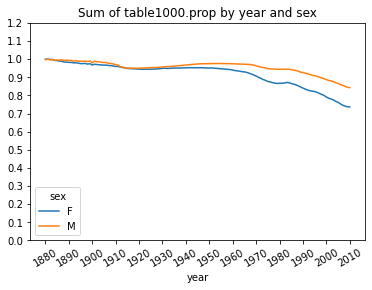

In [16]:
# Измерение роста разнообразия имён
# Доля родившихся в наборе самых популярных имён
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))
plt.xticks(rotation=30)

In [11]:
# Количество различных имён
df=boys[boys.year==2010]
print(df)
prop_cumsum=df.sort_values(by='prop',ascending=False).prop.cumsum()
print(prop_cumsum[:10])
print(prop_cumsum.values.searchsorted(0.5))

           name sex  births  year      prop
260877    Jacob   M   21875  2010  0.011523
260878    Ethan   M   17866  2010  0.009411
260879  Michael   M   17133  2010  0.009025
260880   Jayden   M   17030  2010  0.008971
260881  William   M   16870  2010  0.008887
...         ...  ..     ...   ...       ...
261872   Camilo   M     194  2010  0.000102
261873   Destin   M     194  2010  0.000102
261874   Jaquan   M     194  2010  0.000102
261875   Jaydan   M     194  2010  0.000102
261876   Maxton   M     193  2010  0.000102

[1000 rows x 5 columns]
260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64
116


25
sex    F   M
year        
1880  38  14
1881  38  14
1882  38  15
1883  39  15
1884  39  16


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

<Figure size 432x288 with 0 Axes>

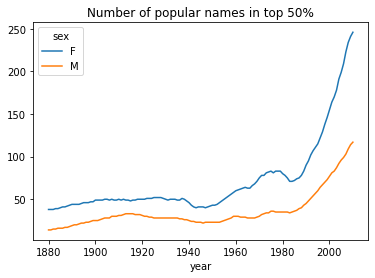

In [17]:
df=boys[boys.year==1900]
in1900=df.sort_values(by='prop',ascending=False).prop.cumsum()
print(in1900.values.searchsorted(0.5)+1)
# Применить для каждого года и пола
def get_quantile_count(group,q=0.5):
    group=group.sort_values(by='prop',ascending=False)
    return group.prop.cumsum().values.searchsorted(q)+1
diversity=top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity=diversity.unstack('sex')
print(diversity.head())
plt.figure()
diversity.plot(title='Number of popular names in top 50%')

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64
sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  

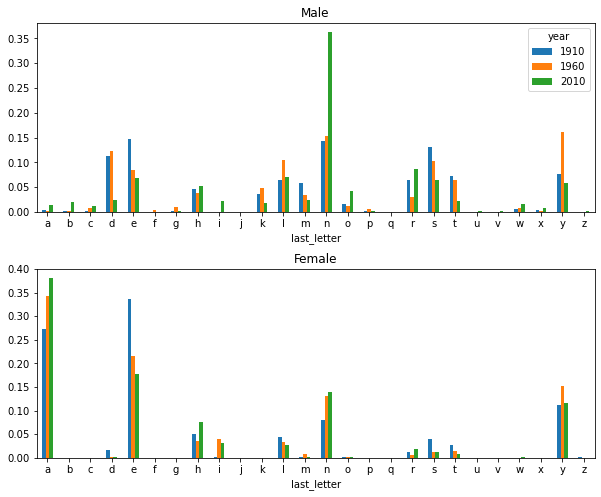

In [25]:
# Революция последней буквы
# Получить последнюю букву
get_last_letter=lambda x:x[-1]
last_letter=names.name.map(get_last_letter)
last_letter.name='last_letter'

table=names.pivot_table('births', index=last_letter,
                       columns=['sex','year'], aggfunc=sum)
# Выбрать три репрезентативных года
subtable=table.reindex(columns=[1910,1960,2010],level='year')
print(subtable.head())
# Нормирование
print(subtable.sum())
letter_prop=subtable/subtable.sum()
print(letter_prop)
# Визуализация
import matplotlib.pyplot as plt
fig,axes=plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female',
                     legend=False)
plt.subplots_adjust(hspace=0.3)

last_letter         d         n         y
year                                     
1880         0.083055  0.153213  0.075760
1881         0.083247  0.153214  0.077451
1882         0.085340  0.149560  0.077537
1883         0.084066  0.151646  0.079144
1884         0.086120  0.149915  0.080405


<AxesSubplot:xlabel='year'>

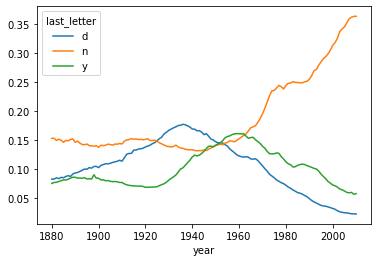

In [26]:
# Для графика изменения тенденций
letter_prop=table/table.sum()
dny_ts=letter_prop.loc[['d','n','y'],'M'].T
print(dny_ts.head())
dny_ts.plot()

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object
name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64
sex     F   M
year         
2006  1.0 NaN
2007  1.0 NaN
2008  1.0 NaN
2009  1.0 NaN
2010  1.0 NaN


<AxesSubplot:xlabel='year'>

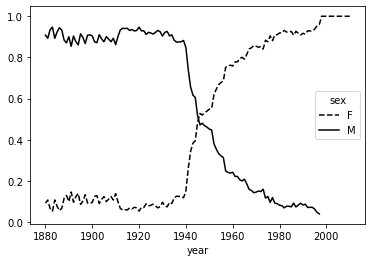

In [27]:
# Мужские имена ставшие женскими и наоборот
all_names=pd.Series(top1000.name.unique())
lesley_like=all_names[all_names.str.lower().str.contains('lesl')]
print(lesley_like)
# Оставить только эти имена
filtered=top1000[top1000.name.isin(lesley_like)]
print(filtered.groupby('name').births.sum())

table=filtered.pivot_table('births',index='year',
                          columns='sex',aggfunc='sum')
table=table.div(table.sum(1),axis=0)
print(table.tail())
table.plot(style={'M':'k-','F':'k--'})